# Quantifying Market Sentiment and Its Impact on Stock Prices

## Introduction

This study was undertaken to explore the relationship between sentiments expressed on social media and news and their influence on stock prices. The primary research question driving this investigation was: To what extent do sentiments expressed on social media and news impact stock prices? The overarching goal was to provide valuable insights for investors and traders by understanding the dynamics between market sentiments and stock price movements.

## Motivation

The motivation behind this project stems from the increasing recognition of the influential role that sentiments expressed on social media and news platforms play in shaping stock market dynamics. As the financial landscape becomes more interconnected with digital communication channels, understanding the correlation between market sentiments and stock prices has emerged as a crucial factor for effective investment strategies. The surge in real-time information sharing on social platforms and the rapid dissemination of news necessitate a comprehensive exploration of how sentiments contribute to stock price movements. By delving into this relationship, the project aims to empower investors and traders with valuable insights, enhancing their decision-making processes in the dynamic realm of financial markets.ssary dependencies as specified in the project's requirements file located in the project folder.


## Methodology

The implemented Python script `pipeline.py` outlines a comprehensive data pipeline designed to collect, preprocess, and integrate data from diverse sources, enhancing the foundation for subsequent analyses.

1. **Kaggle Dataset Download:**
   - Utilizes the Kaggle API to download datasets related to stock exchange data and news articles.
   - Configures the Kaggle API with authentication details and sets the download directory.

2. **Dataset Preprocessing:**
   - Defines preprocessing functions specific to each dataset source.
   - Renames columns, handles datetime formats, and filters data to focus on the relevant time period (e.g., 2021).
   - Applies sentiment analysis to news articles to derive sentiment compound scores.

3. **SQLite Migration:**
   - Transfers the preprocessed data to an SQLite database.
   - Creates an SQLite engine and migrates data to appropriate tables with specified rules (replace or append).

4. **Overall Pipeline:**
   - Combines the above steps into a cohesive pipeline.
   - Calls functions sequentially to ensure a streamlined process from dataset download to SQLite migration.
   
In the Jupyter Notebook, data previously stored in SQLite is retrieved and utilized for in-depth analysis. Leveraging SQL queries and Python, this notebook explores relationships, patterns, and trends within the data, facilitating a comprehensive understanding of the underlying insights derived from the preprocessed and transformed datasets.

1. **SQLite Data Retrieval:**
   - Connects to the SQLite database and retrieves the preprocessed data.
   - Executes SQL queries or utilizes Pandas to fetch relevant datasets for analysis.

2. **Exploratory Data Analysis (EDA):**
   - Conducts exploratory data analysis to understand the characteristics of the datasets.
   - Creates visualizations and summary statistics to identify patterns and trends.

3. **Statistical Analysis and Modeling:**
   - Performs statistical analysis to quantify the impact of sentiments on stock price movements.
   - Applies modeling techniques to further explore correlations and relationships within the data.

4. **Real-World Trading Scenarios:**
   - Explores the practical applicability of the insights gained in real-world trading scenarios.
   - Considers the implications of sentiment analysis on decision-making for investors and traders.


## Data Sources and Explanation

### Stock Price Data

We sourced daily price data for global stock exchanges, including indexes from the United States, China, Canada, Germany, Japan, and more. This data was obtained from Kaggle, and it encompasses several decades of historical data from Yahoo Finance.

- **Metadata URL:** [Stock Exchange Data on Kaggle](https://www.kaggle.com/datasets/mattiuzc/stock-exchange-data/data)
- **Data URL:** [Stock Exchange Data on Kaggle](https://www.kaggle.com/datasets/mattiuzc/stock-exchange-data?select=indexData.csv)
- **Data Type:** CSV

### News Data

Two datasets from Kaggle were utilized for news sentiment analysis. The first dataset contains news headlines published over nineteen years by the Australian Broadcasting Corporation (ABC). The second dataset collects RSS feeds from BBC News using a self-updating mechanism.

- **ABC News Data:**
  - **Metadata URL:** [ABC News Headlines on Kaggle](https://www.kaggle.com/datasets/therohk/million-headlines)
  - **Data URL:** [ABC News Headlines on Kaggle](https://www.kaggle.com/datasets/therohk/million-headlines?select=abcnews-date-text.csv)
  - **Data Type:** CSV

- **BBC News Data:**
  - **Metadata URL:** [BBC News on Kaggle](https://www.kaggle.com/datasets/gpreda/bbc-news)
  - **Data URL:** [BBC News on Kaggle](https://www.kaggle.com/datasets/gpreda/bbc-news?select=bbc_news.csv)
  - **Data Type:** CSV


## Project Execution

### Prerequisites

1. **Kaggle Account and API Key:**
   - Ensure you have a Kaggle account.
   - Generate a Kaggle API key from your Kaggle account settings.
   - Place the Kaggle API key (`kaggle.json`) in the root directory of this project.

2. **Python Environment:**
   - Make sure you have Python installed (version 3.x is recommended).

### Environment Setup

1. **Create a Virtual Environment (Optional):**
   - It's recommended to create a virtual environment before installing packages. Use the following commands:

     ```
     python -m venv venv
     source venv/bin/activate  # On Windows: venv\Scripts\activate
     ```

2. **Install Required Packages:**
   - Install the required Python packages by running the following command in your terminal or command prompt:

     ```
     pip install -r requirements.txt
     ```

3. **Pipeline Execution:**
   - Execute the pipeline and ensure a seamless data processing flow by running the following command in your terminal or command prompt:

     ```
     bash pipeline.sh'
     ```

     or running the following command, if you are willing to run the pipeline with system testing

     ```
     bash tests.sh'
     ```     


Begin by installing all the necessary dependencies as specified in the project's requiements file located in the project folder.


## Importing Libraries

The `sqlite3` library facilitates interaction with SQLite databases, enabling efficient data storage and retrieval. `Pandas` excels in data manipulation and analysis, providing data structures like DataFrames. `NumPy` supports numerical operations and array computations. `Seaborn` and `Matplotlib` are indispensable for data visualization, offering a plethora of plotting options. `Plotly Express` and `Plotly Graph Objects` enhance interactive plotting capabilities, especially in web environments. `Make Subplots` from Plotly aids in creating complex subplot layouts. `WordCloud` generates visually appealing word clouds from text data. Finally, `IPython.display` enables HTML rendering for seamless display of visualizations in Jupyter port display, HTML

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from wordcloud import WordCloud
from IPython.display import display, HTML

## Importing Data

The code connects to a SQLite database containing stock exchange data, specifying a time period from January to December 2021. It retrieves distinct stock index names within this timeframe. The resulting DataFrame is displayed as an HTML table. The `database_file` variable holds the path to the SQLite database, and the `start_date` and `end_date` variables define the date range for the query. The code utilizes the `sqlite3` and `pandas` libraries for database connectivity and data manipulation, respectively. The retrieved stock index names are then displayed using the `display` and `HTML` functions in a Jupyter notebook or a similar environment.

In [2]:
database_file = '../data/made-project.sqlite'

# Define the time period (e.g., January 2021)
start_date = '2021-01-01'
end_date = '2021-12-31'

conn = sqlite3.connect(database_file)

stock_query = f"SELECT DISTINCT \"index\" as stock FROM stock_exchange_data WHERE date BETWEEN '{start_date}' AND '{end_date}';"
stock_names = pd.read_sql_query(stock_query, conn)

conn.close()

display(HTML(stock_names.head().to_html()))

,stock
0,NYA
1,IXIC
2,HSI
3,000001.SS
4,GSPTSE


This code prompts the user to select a stock index for analysis, querying corresponding stock and news information within a specified date range. If the selected stock has data, it displays the stock's open, high, low, close prices, adjusted close, and volume, along with relevant news data. The user must choose a stock from the initial list of stocks displayed. The code utilizes SQLite, pandas, and interactive input to facilitate exploratory analysis of stock and news data.

In [4]:
conn = sqlite3.connect(database_file)

while True:
    stock_name = input('Select a stock index for analysis (or type "exit" to quit): ')
    
    if stock_name.lower() == 'exit':
        break  # Exit the loop if the user enters 'exit'
    
    # Query stock data
    stock_query = f"SELECT strftime('%Y-%m-%d', date) as date, \"index\" as stock, open, high, low, close, adj_close, volume FROM stock_exchange_data WHERE date BETWEEN '{start_date}' AND '{end_date}' AND \"index\" = '{stock_name}';"
    stock_data = pd.read_sql_query(stock_query, conn)

    # Query news data
    news_query = f"SELECT strftime('%Y-%m-%d', date) as date, title, description, sentiment_compound, keywords, source FROM analysed_news WHERE date BETWEEN '{start_date}' AND '{end_date}';"
    news_data = pd.read_sql_query(news_query, conn)

    # Check if records are found for the given stock index
    if not stock_data.empty:
        # Display or process the data as needed
        print(f"Data found for stock index {stock_name}:\n")
        
        #print("Stock Data:")
        #display(HTML(stock_data.head().to_html()))

        #print("\nNews Data:")
        #display(HTML(news_data.head().to_html()))
       
        break  
    else:
        print(f"No data found for stock index {stock_name}. Please try again.\n")

conn.close()

Select a stock index for analysis (or type "exit" to quit):  NYA


Data found for stock index NYA:



Various financial metrics and technical indicators derived from the standard OHLC (Open, High, Low, Close) data columns to provide additional insights into a stock's performance. Here are some commonly calculated columns:

1. **Daily Returns:**
   - This column represents the percentage change in the stock's closing price from one day to the next.
   - Formula: 
     - Daily Return = (Closeₜ - Closeₜ₋₁) / Closeₜ₋₁

2. **Log Returns:**
   - Logarithmic returns are often used in financial analysis and can be more appropriate for certain calculations.
   - Formula: 
     - Log Return = ln(Closeₜ / Closeₜ₋₁)

3. **Moving Averages:**
   - Moving averages smooth out price data to identify trends over a specified period.
   - Common types include the Simple Moving Average (SMA) and Exponential Moving Aveo4 log returns.

5. **Relative Strength Index (RSI):**
   - RSI is a momentum oscillator that measures the speed and change of price movements.
   - It ranges from 0 to 100 and is used to identify overbought or ov5rsold conditions.

6. **Moving Average Convergence Divergence (MACD):**
   - MACD is a trend-following momentum indicator that shows the relationship between two moving averages.
   - It consists of the MACD line, sigcating overbought or oversold conditions.

7. **Aggregate Sentiment Scores:**
   - Sentiment scores are aggregated by date to provide a holistic view of market sentiment over time.

In [11]:
# Calculating new data columns for Stock analysis 

# Daily Returns
stock_data['daily_return'] = stock_data['close'].pct_change().fillna(0)

# Log Returns
stock_data['log_return'] = (
    (stock_data['close'] / stock_data['close'].shift(1))
    .apply(lambda x: 0 if pd.isna(x) else np.log(x))
)

# Moving Averages
window = 10  # You can adjust the window size as needed
stock_data['sma'] = stock_data['close'].rolling(window=window).mean()
stock_data['ema'] = stock_data['close'].ewm(span=window, adjust=False).mean()

# Relative Strength Index (RSI)
rsi_window = 14  # You can adjust the window size as needed
delta = stock_data['close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=rsi_window).mean()
avg_loss = loss.rolling(window=rsi_window).mean()
rs = avg_gain / avg_loss
stock_data['rsi'] = 100 - (100 / (1 + rs))

# Moving Average Convergence Divergence (MACD)
short_window = 12
long_window = 26
signal_window = 9
stock_data['short_ma'] = stock_data['close'].ewm(span=short_window, adjust=False).mean()
stock_data['long_ma'] = stock_data['close'].ewm(span=long_window, adjust=False).mean()
stock_data['macd'] = stock_data['short_ma'] - stock_data['long_ma']
stock_data['signal_line'] = stock_data['macd'].ewm(span=signal_window, adjust=False).mean()
stock_data['macd_histogram'] = stock_data['macd'] - stock_data['signal_line']

merged_data = pd.merge(stock_data, news_data, on='date', how='inner')

# Aggregate sentiment scores by date
aggregated_sentiment = merged_data.groupby('date')['sentiment_compound'].mean().reset_index()
merged_data = pd.merge(merged_data, aggregated_sentiment, on='date', how='inner', suffixes=('', '_aggr'))

# Display the updated DataFrame
display(HTML(merged_data.describe().to_html()))

,open,high,low,close,adj_close,volume,daily_return,log_return,sma,ema,rsi,short_ma,long_ma,macd,signal_line,macd_histogram,sentiment_compound,sentiment_compound_aggr
count,8391.000000,8391.000000,8391.000000,8391.000000,8391.000000,8.391000e+03,8391.000000,8391.000000,7397.000000,8391.000000,6905.000000,8391.000000,8391.000000,8391.000000,8391.000000,8391.000000,8391.000000,8391.000000
mean,15335.204089,15429.015954,15242.821940,15348.491024,15348.491024,5.107421e+09,0.001235,0.001193,15343.708283,15255.347073,58.604668,15235.691032,15112.521678,123.169354,115.949856,7.219498,-0.079228,-0.079228
std,511.144996,495.111669,520.049763,508.431896,508.431896,1.098523e+09,0.009173,0.009187,466.904125,498.787906,12.852229,497.740608,481.885125,48.524046,39.462447,34.891368,0.344414,0.049831
min,14378.700200,14579.280270,14258.250000,14376.700200,14376.700200,2.947400e+09,-0.025535,-0.025867,14748.819923,14376.700200,32.261461,14376.700200,14376.700200,0.000000,0.000000,-70.682680,-0.924600,-0.188941
25%,14975.429690,15037.490230,14860.559570,14975.429690,14975.429690,4.504860e+09,-0.004475,-0.004485,14968.804981,14846.481656,49.337919,14837.368605,14738.741413,91.734141,97.343514,-21.837460,-0.318200,-0.114759
50%,15288.379880,15373.769530,15195.849610,15288.379880,15288.379880,4.846900e+09,0.002396,0.002394,15285.953906,15234.199945,56.715157,15213.601948,15068.114504,132.423965,123.869708,11.675961,0.000000,-0.084809
75%,15601.740230,15701.820310,15522.660160,15626.110350,15626.110350,5.496340e+09,0.007215,0.007189,15543.123926,15505.725372,64.940287,15491.939631,15346.272921,165.238704,144.787784,34.963326,0.000000,-0.059079
max,16590.429690,16685.890630,16531.949220,16590.429690,16590.429690,9.878040e+09,0.021139,0.020918,16411.391114,16433.369909,89.239595,16418.716269,16313.820332,189.585066,178.458910,69.698324,0.895700,0.199986


## In-Depth Analysis of Social Media and News Impact on Stock Prices

A correlation matrix is a table that shows the correlation coefficients between all pairs of features in a dataset. The correlation coefficients between the `sentiment compound score` and the `stock features` are shown in the cells at the intersection of the sentiment compound score row and column with the other feature rows and columns. For example, the correlation coefficient between the `sentiment compound score` and the `open price` is 0.02. This means that there is a very weak positive correlation between the `sentiment compound score` and the `open price`. In other words, when the sentiment compound score is higher, the open price tends to be slightly higher, but the relationship is very weak. 

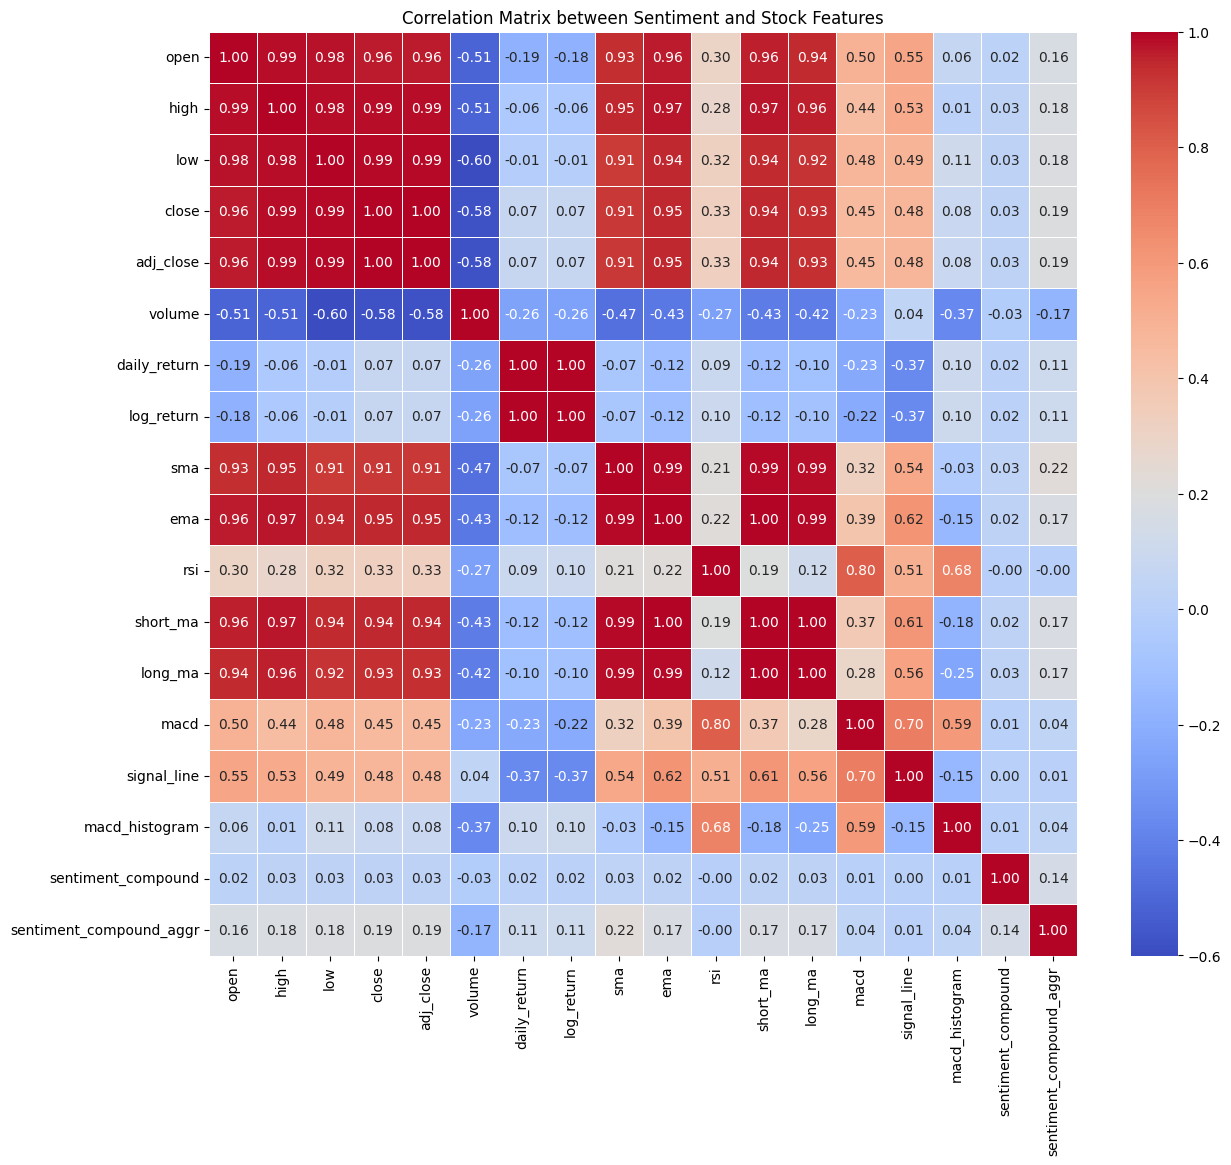

In [12]:
# Compute correlation matrix
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_data[numeric_columns].corr()

# Perform further analysis or visualization as needed
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Sentiment and Stock Features')
plt.show()

# Extract the top correlations
top_correlations = correlation_matrix.unstack().sort_values(ascending=False)


## Question

	To what extent do sentiments expressed on social media and news impact stock prices?

In [9]:
# Assuming 'merged_data' includes columns 'date' and 'sentiment_compound'
# Replace with your actual column names

# Find the day with the least sentiment score
least_sentiment_date = merged_data.loc[merged_data['sentiment_compound_aggr'].idxmin()]['date']
least_sentiment_score = merged_data['sentiment_compound_aggr'].min()

# Find the day with the highest sentiment score
highest_sentiment_date = merged_data.loc[merged_data['sentiment_compound_aggr'].idxmax()]['date']
highest_sentiment_score = merged_data['sentiment_compound_aggr'].max()

# Display the results
print(f"Date with the Least Sentiment Score: {least_sentiment_date}")
print(f"Least Sentiment Score: {least_sentiment_score}")

print(f"\nDate with the Highest Sentiment Score: {highest_sentiment_date}")
print(f"Highest Sentiment Score: {highest_sentiment_score}")


Date with the Least Sentiment Score: 2021-04-30
Least Sentiment Score: -0.18894074074074074

Date with the Highest Sentiment Score: 2021-04-20
Highest Sentiment Score: 0.19998620689655172


To contextualize and address the provided questions, it is essential to analyze statistical information derived from sentiment scores and their correlation with stock prices. The identified date with the least sentiment score on **April 30, 2021**, at -0.1889, and the date with the highest sentiment score on **April 20, 2021**, at 0.1999, offer crucial insights. By exploring the statistical distribution of sentiment scores across various stocks and sectors during these critical dates, we can discern patterns and trends. 

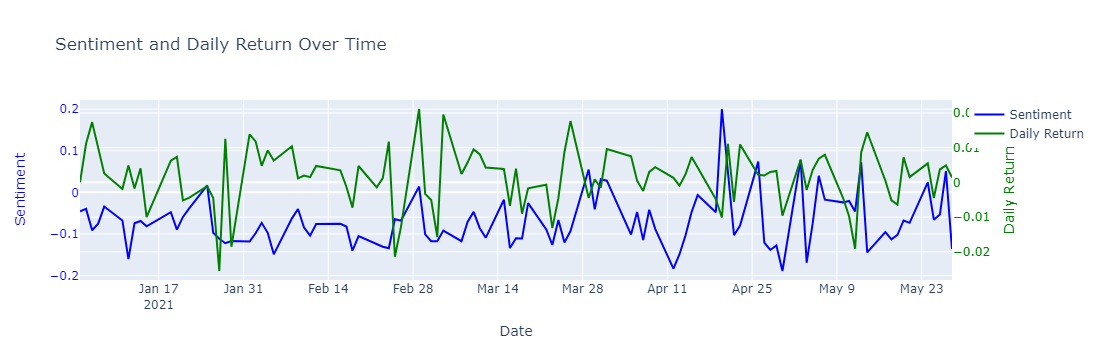

In [14]:
# Create figure with secondary y-axis
fig = go.Figure()

# Add sentiment trace
fig.add_trace(go.Scatter(x=merged_data['date'], y=merged_data['sentiment_compound_aggr'], mode='lines', name='Sentiment', line=dict(color='blue')))

# Add daily return trace on the secondary y-axis
fig.add_trace(go.Scatter(x=merged_data['date'], y=merged_data['daily_return'], mode='lines', name='Daily Return', line=dict(color='green'), yaxis='y2'))

# Update layout with titles and axis labels
fig.update_layout(title='Sentiment and Daily Return Over Time',
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Sentiment', side='left', color='blue'),
                  yaxis2=dict(title='Daily Return', overlaying='y', side='right', color='green'))

# Show the interactive plot
fig.show()

The graph shows that there is a weak positive correlation between the `sentiment compound score` and the `daily return`. This means that when the sentiment compound score is higher, the daily return tends to be slightly higher, but the relationship is very weak. The daily return (orange line) is volatile, with some days seeing large gains and other days seeing large losses due to the other factors affecting the results. Analyzing the aforementioned statistical data, it is clear that the date displayed at the highest sentiment score, April 20, 2021, had the greatest impact on the next day’s market dynamics This effect is reflected in the daily profit, which exhibited a significant change from a negative value of -0.010 to a positive value of 0.011. In contrast, a different pattern is evident on April 30, 2021, the date marked by the lowest sentiment score. The market clearly slowed down during this period, leading to a sharp decline in daily returns, which fell sharply to -0.18. These observed changes highlight the tangible impact that sentiment scores can have on short-term market dynamics.

?


## Conclusion

In conclusion, this study sheds light on the relationship between social media and news sentiments and stock prices. The findings suggest that sentiments expressed in these domains can impact stock movements, providing valuable insights for market participants. Further research and refinement of models are recommended to enhance predictive accuracy and applicability in real-world trading senarios.
